In [ ]:
import numpy as np
from scipy.stats import poisson
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

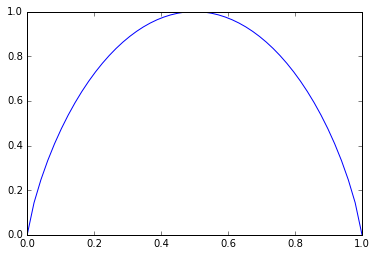

In [1]:
import numpy as np
from scipy.stats import poisson
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

#1
H_1 = lambda p: - p * np.log2(p) - (1- p) *np.log2(1- p) if p != 0 and p != 1 else 0
p = np.linspace(0,1)
plt.plot(p, [H_1(i) for i in p])

In [2]:
#2
r = np.arange(0,100)
s = np.linspace(0,10)
prf = 5
Ps = 1.0/len(s)
max = 50.0
std = 2

H_Ps = sum([-np.log2(Ps)*Ps for i in s])
H_Ps

5.6438561897747279

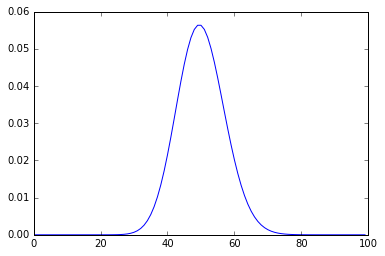

In [3]:
#3
Pr_s = lambda r,s,std, max: poisson.pmf(r, sp.stats.norm.pdf(s,prf,std)*max/sp.stats.norm.pdf(prf,prf,std)) # posterior probability
plt.plot(r, Pr_s(r, 5, std, max))

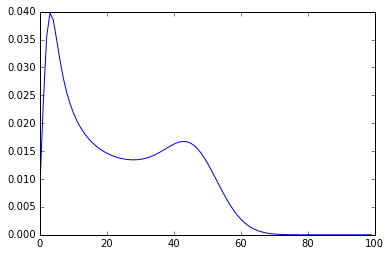

In [4]:
#4
Pr = lambda r, std, max: sum(poisson.pmf(r, sp.stats.norm.pdf(s,prf,std)*max/sp.stats.norm.pdf(prf,prf,std))*Ps)
plt.plot(r, [Pr(i, std, max) for i in r])

In [5]:
#5
H = lambda std, max: sum([-np.log2(Pr(i, std, max))*Pr(i,std, max) for i in r if  Pr(i,std, max) != 0])
H(std, max)

5.832090586791602

In [6]:
#6
Im_s = lambda s, std,max: sum([Ps*Pr_s(i,s, std, max)*np.log2(Pr_s(i,s, std, max)/Pr(i, std, max)) for i in r if Pr_s(i,s,std,max)/Pr(i,std,max) != 0])
Im =  lambda std, max: sum([Im_s(i, std, max) for i in s])
print 'Im = ', Im(std, max)

Im =  1.75944718331


In [7]:
#7
Prs = lambda r,s, std, max: Pr_s(r,s, std, max)*Ps # joint probability
kl_s = lambda s, std, max: sum([Prs(i,s, std, max)*np.log2(Prs(i, s, std, max)/Pr(i, std, max)/Ps) for i in r if Prs(i, s, std, max)/Pr(i, std, max)/Ps != 0])
kl = lambda std, max: sum([kl_s(i, std, max) for i in s])
print 'KL divergence between P[r,s] and P[r]P[s] = ', kl(std ,max)

KL divergence between P[r,s] and P[r]P[s] =  1.75944718331


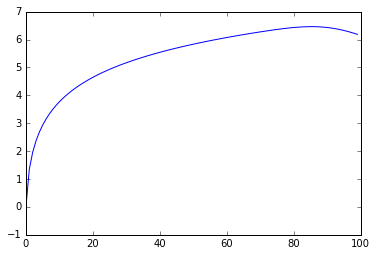

In [8]:
#8
max_vec = np.arange(0,100)
plt.plot(max_vec, [H(std, i) for i in max_vec])

In [9]:
#9
std2=10
Im(std2, max)

0.049353896425876932

/home/python/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1645: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/python/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1645: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/python/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1645: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/python/2.7/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:451: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


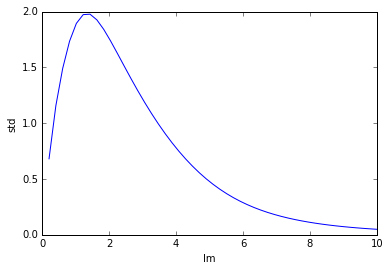

In [10]:
#Appendix
std_vec = np.linspace(0, 10)
plt.plot(std_vec, [Im(i, max) for i in std_vec])

plt.xlabel('Im')
plt.ylabel('std')